In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [0]:
user_data = pd.read_csv("https://gist.githubusercontent.com/sethsaps123/bb526db9b066544872e2ab703b77346e/raw/72222691b6e8a176b948a8866c058b9aa862468f/noaa-sample-devices-july-2018", header=0)
user_data["location_at"] = pd.to_datetime(user_data["location_at"])

In [8]:
user_data.head()

,advertiser_id,latitude,longitude,location_at
0,0676772A-CC6F-4DC5-95AC-D20CBB254A9E,35.173816,-101.865715,2018-07-05 00:00:43.410
1,0676772A-CC6F-4DC5-95AC-D20CBB254A9E,35.173809,-101.865711,2018-07-05 00:09:28.785
2,0676772A-CC6F-4DC5-95AC-D20CBB254A9E,35.173809,-101.865711,2018-07-05 00:12:50.439
3,0676772A-CC6F-4DC5-95AC-D20CBB254A9E,35.173809,-101.865711,2018-07-05 00:14:31.013
4,0676772A-CC6F-4DC5-95AC-D20CBB254A9E,35.173809,-101.865813,2018-07-05 00:19:42.621


In [9]:
group_advertiser_id = user_data["advertiser_id"].unique()
print(group_advertiser_id)

['0676772A-CC6F-4DC5-95AC-D20CBB254A9E'
 '22089427-D868-4B76-912C-63F4542F8693'
 '3ADF3D24-F72E-42FF-A345-9D3826FCE322'
 '7BEBC4A7-CECF-4574-B1BD-8C22B92BEFF1'
 '8DB7F625-A35C-41BD-BEFE-994BF0B854C8'
 'AB1C6D05-CD8C-49BB-967A-B79A6F1C76F7'
 'B080274B-A8E3-4997-84C1-76F35AC7B7A2'
 'BDD3F0BF-D781-4490-BB8E-9899522D6A8A'
 'C294DDFD-E8F1-4C4F-ACEB-C816D6262699'
 'F282C09F-E9D7-4EAD-977E-0CBBE5E76D6A']


In [14]:
df_list = []
for uid in group_advertiser_id:
  df_list.append(user_data[user_data["advertiser_id"] == uid])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


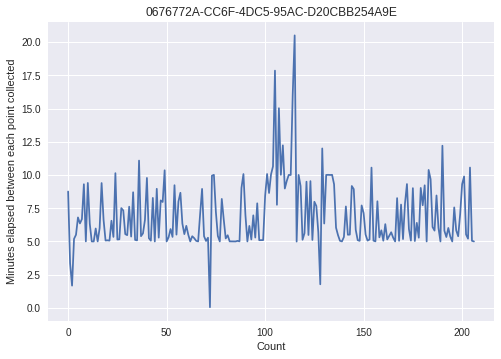

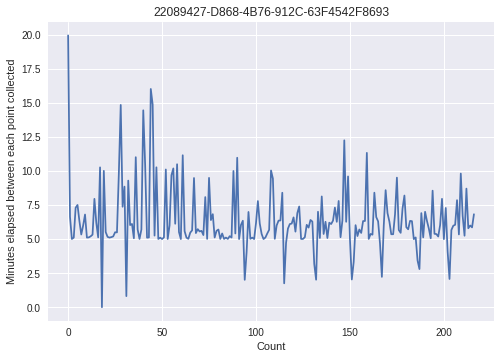

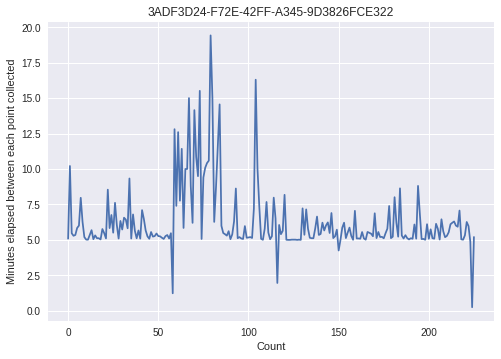

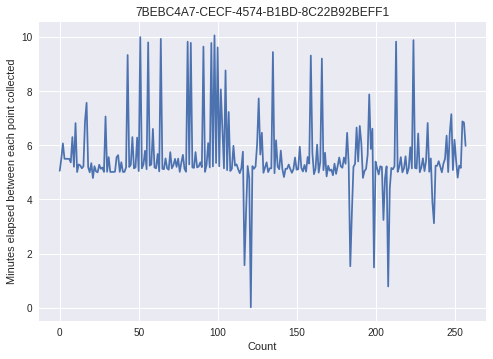

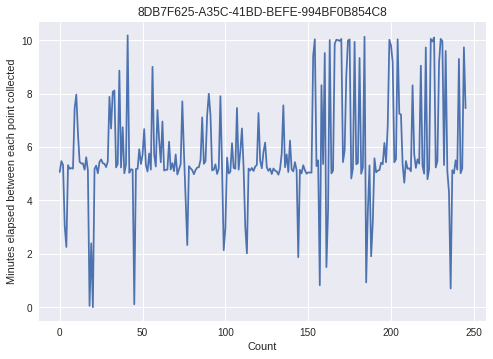

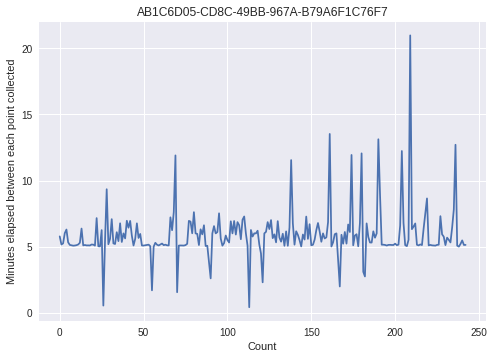

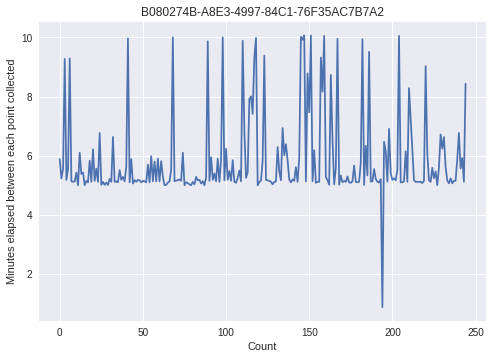

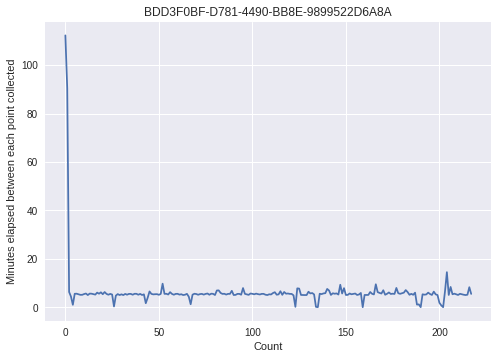

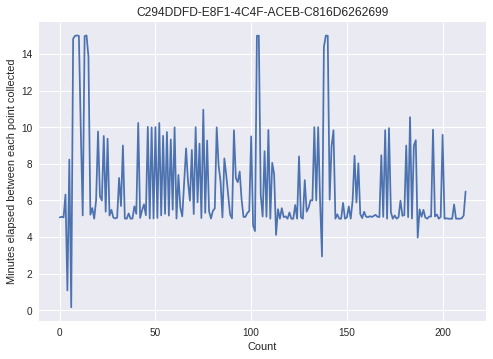

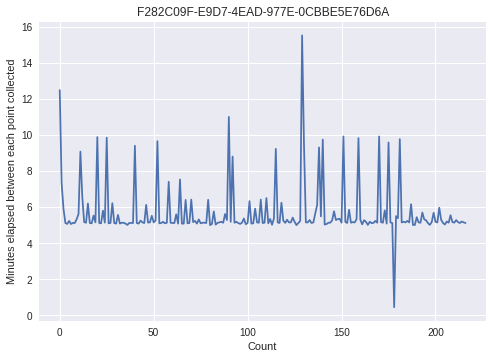

In [23]:
for df in df_list:
  df.sort_values("location_at", inplace=True)
  prev = df.iloc[0]["location_at"]
  diff = []
  for row in range(1, len(df)):
    timediff = (df.iloc[row]["location_at"] - prev).total_seconds()
    prev = df.iloc[row]["location_at"]
    diff.append(timediff / 60)
  count = np.arange(0, len(diff))
  plt.plot(count, diff)
  plt.title(df["advertiser_id"].iloc[0])
  plt.xlabel("Point Number")
  plt.ylabel("Minutes elapsed between each point collected")
  plt.show()